### **Import Library**


In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

### **Load Dataset**


In [111]:
df = pd.read_csv('dataset_stunting.csv')

In [112]:
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
0,laki-laki,0,46.3,-1.893291,normal
1,laki-laki,0,50.5,0.325286,normal
2,laki-laki,0,45.8,-2.157408,stunted
3,laki-laki,0,49.1,-0.414240,normal
4,laki-laki,0,55.0,2.702332,normal


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40755 entries, 0 to 40754
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Jenis Kelamin      40755 non-null  object 
 1   Umur (bulan)       40755 non-null  int64  
 2   Tinggi Badan (cm)  40755 non-null  float64
 3   Z-score WHO        40755 non-null  float64
 4   Status Gizi WHO    40755 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.6+ MB


In [114]:
df.describe(include='all')

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Z-score WHO,Status Gizi WHO
count,40755,40755.000000,40755.000000,40755.000000,40755
unique,2,NaN,NaN,NaN,4
top,perempuan,NaN,NaN,NaN,normal
freq,20633,NaN,NaN,NaN,22484
mean,NaN,27.583094,85.262532,0.087779,NaN
std,NaN,19.396535,20.022239,2.837584,NaN
min,NaN,0.000000,40.010437,-7.038928,NaN
25%,NaN,9.000000,70.600000,-2.215253,NaN
50%,NaN,28.000000,87.600000,0.024778,NaN
75%,NaN,45.000000,100.400000,2.310763,NaN


In [115]:
print(df['Status Gizi WHO'].value_counts())

Status Gizi WHO
normal              22484
tall                 7099
severely stunted     6664
stunted              4508
Name: count, dtype: int64


In [116]:
print(df['Umur (bulan)'].value_counts())


Umur (bulan)
2     2284
1     2276
0     2266
59     691
57     682
      ... 
11     493
13     492
15     483
12     471
9      427
Name: count, Length: 61, dtype: int64


In [117]:
df.isnull().sum()

Jenis Kelamin        0
Umur (bulan)         0
Tinggi Badan (cm)    0
Z-score WHO          0
Status Gizi WHO      0
dtype: int64

In [118]:
df.duplicated().sum()

np.int64(174)

In [119]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [120]:
df = df.drop(columns=['Z-score WHO'])

### **EDA**


In [121]:
df_eda = df.copy()
df_eda.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Status Gizi WHO
0,laki-laki,0,46.3,normal
1,laki-laki,0,50.5,normal
2,laki-laki,0,45.8,stunted
3,laki-laki,0,49.1,normal
4,laki-laki,0,55.0,normal


In [122]:
print(df_eda['Umur (bulan)'].value_counts())

Umur (bulan)
2     2284
1     2276
0     2266
59     691
57     682
      ... 
11     491
13     490
15     481
12     469
9      426
Name: count, Length: 61, dtype: int64


In [123]:
print(df_eda['Status Gizi WHO'].value_counts())

Status Gizi WHO
normal              22338
tall                 7098
severely stunted     6657
stunted              4488
Name: count, dtype: int64


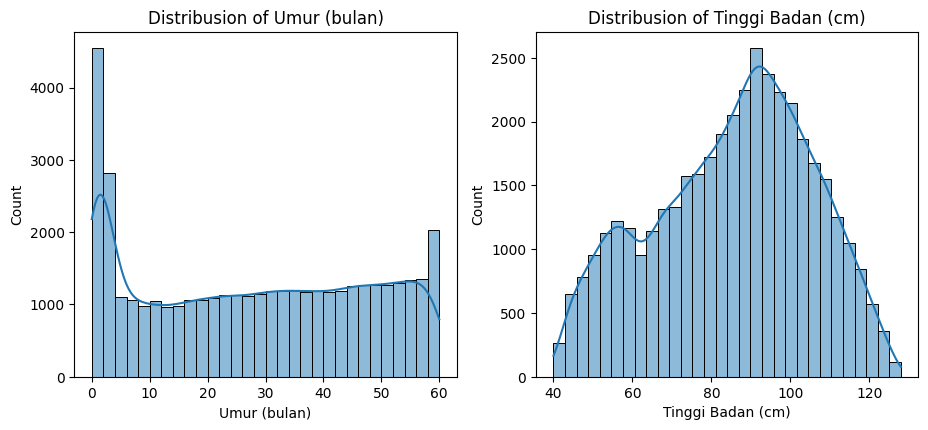

In [124]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(df_eda.select_dtypes(include=['number']).columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_eda[column], bins=30, kde=True, color='#1f77b4')
    plt.title(f'Distribusion of {column}')

plt.tight_layout()
plt.show()

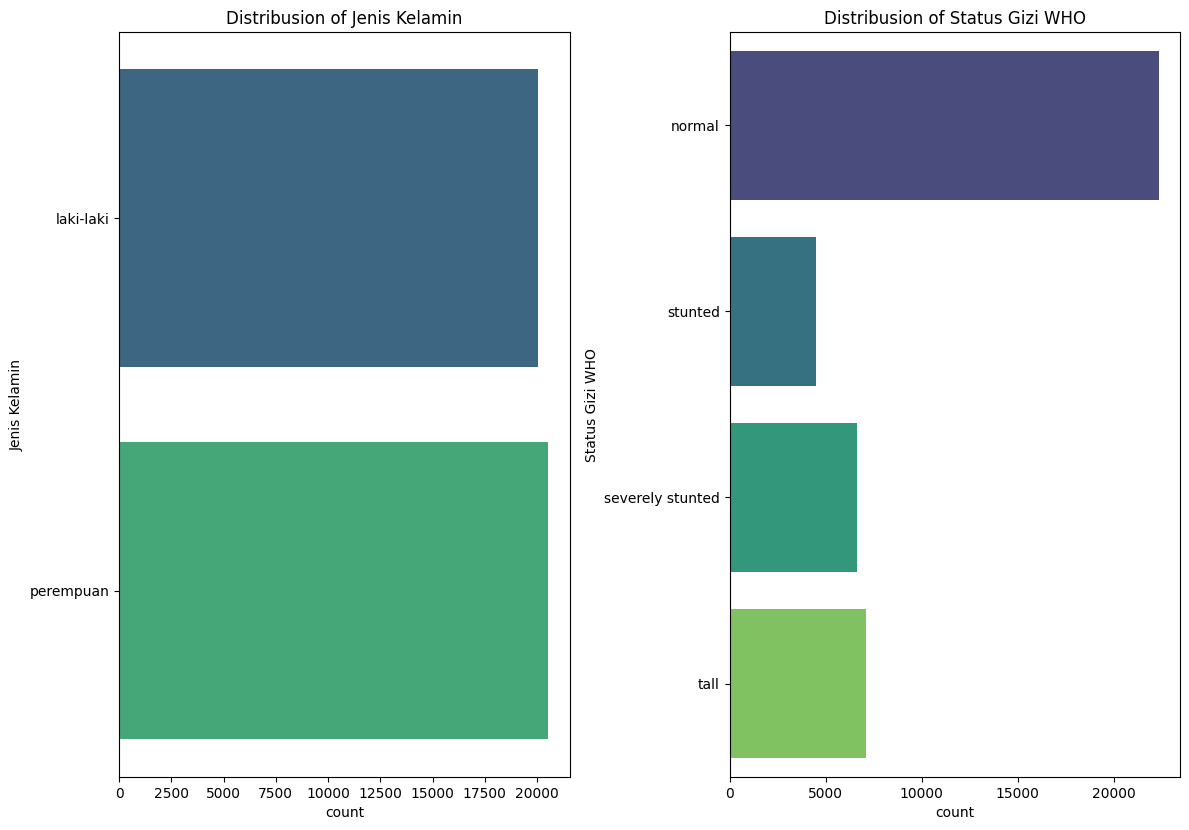

In [125]:
cat_features = df_eda[['Jenis Kelamin', 'Status Gizi WHO']]

plt.figure(figsize=(12, 16))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df_eda[column], palette='viridis', hue=df_eda[column], legend=False)
    plt.title(f'Distribusion of {column}')

plt.tight_layout()
plt.show()

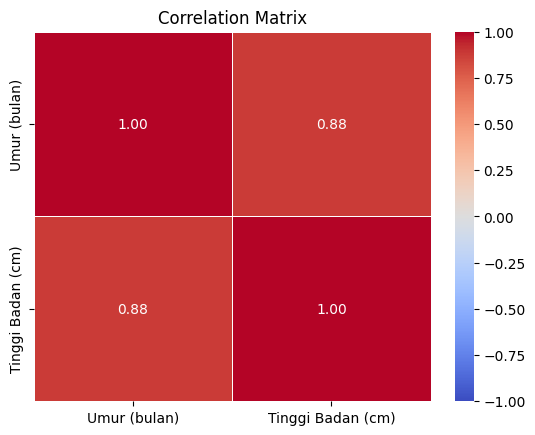

In [126]:
plt.figure()

correlation_matrix = df_eda.select_dtypes(include=["number"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()

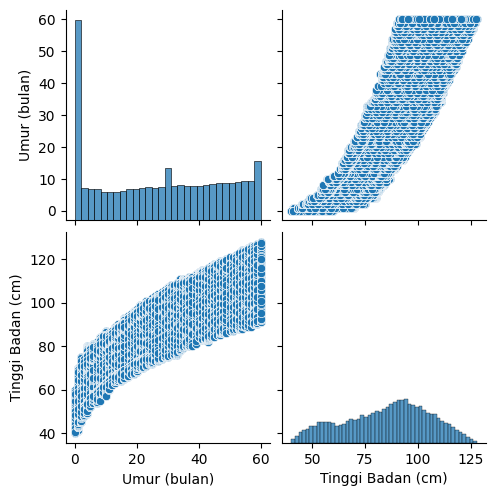

In [127]:
sns.pairplot(df_eda.select_dtypes(include=['number']))
plt.show()

### **Data Preprocessing**


In [128]:
# Encode
categorical_features = df_eda.select_dtypes(include=['object']).columns

encoders = {}

for col in categorical_features:
    label_encoder = LabelEncoder()
    df_eda[col] = label_encoder.fit_transform(df[col].astype(str))
    encoders[col] = label_encoder

df_eda.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Status Gizi WHO
0,0,0,46.3,0
1,0,0,50.5,0
2,0,0,45.8,2
3,0,0,49.1,0
4,0,0,55.0,0


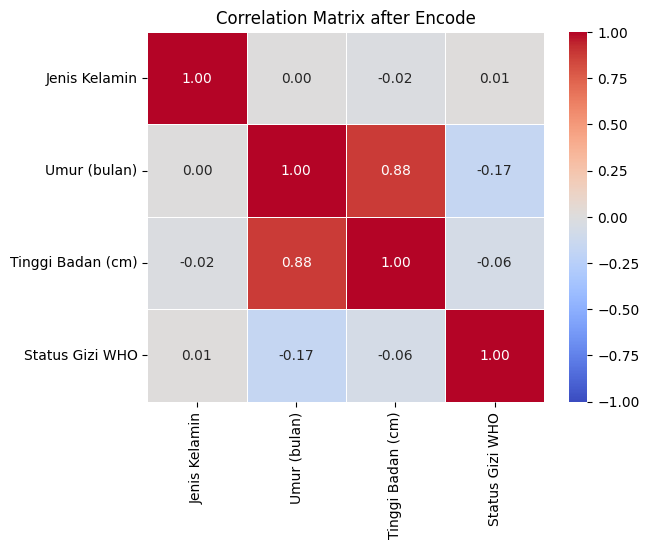

In [129]:
plt.figure()

correlation_matrix = df_eda.select_dtypes(include=["number"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix after Encode')

plt.show()

In [130]:
import numpy as np
print("Umur min–max:", np.min(df['Umur (bulan)']), np.max(df['Umur (bulan)']))
print("Tinggi min–max:", np.min(df['Tinggi Badan (cm)']), np.max(df['Tinggi Badan (cm)']))

Umur min–max: 0 60
Tinggi min–max: 40.0104370037594 128.0


### **Data Splitting**


In [131]:
X = df.drop(columns=['Status Gizi WHO'])
y = df['Status Gizi WHO']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Training set shape: (32464, 3)
Test set shape: (8117, 3)


In [132]:
# Encoder untuk fitur kategorikal (X)
label_encoder_X = LabelEncoder()
X_train['Jenis Kelamin'] = label_encoder_X.fit_transform(X_train['Jenis Kelamin'].astype(str))

# Encoder untuk target (y)
label_encoder_y = LabelEncoder()
y_train = label_encoder_y.fit_transform(y_train.astype(str))

# Simpan encoder yang benar ke file sehingga dapat digunakan saat preprocessing test
pickle.dump(label_encoder_X, open('encoder.pkl', 'wb'))
pickle.dump(label_encoder_y, open('encoder_y.pkl', 'wb'))

X_train.head(10)

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm)
12046,0,35,105.700000
39137,1,56,104.200000
28188,1,20,84.800000
11712,0,34,105.100000
33815,1,39,100.200000
4471,0,6,54.800000
22034,1,1,68.597492
29696,1,25,90.000000
15762,0,47,113.000000
5660,0,11,78.100000


In [133]:
print(y_train[:10])

[0 0 0 0 0 1 3 0 0 0]


In [134]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [135]:
print("Sebelum SMOTE:", pd.Series(y_train).value_counts())
print("Sesudah SMOTE:", pd.Series(y_train_res).value_counts())

Sebelum SMOTE: 0    17949
3     5645
1     5277
2     3593
Name: count, dtype: int64
Sesudah SMOTE: 0    17949
1    17949
3    17949
2    17949
Name: count, dtype: int64


In [136]:
X_train_res.describe()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm)
count,71796.000000,71796.000000,71796.000000
mean,0.503984,26.491629,82.376002
std,0.499988,19.452780,19.730444
min,0.000000,0.000000,40.010437
25%,0.000000,7.000000,68.325750
50%,1.000000,26.000000,84.000000
75%,1.000000,44.000000,95.500000
max,1.000000,60.000000,128.000000


In [137]:
# Scaling
standard_feature = ['Umur (bulan)', 'Tinggi Badan (cm)']

standard_scaler = StandardScaler()
X_train_res[standard_feature] = standard_scaler.fit_transform(X_train_res[standard_feature])

pickle.dump(standard_scaler, open('scaler.pkl', 'wb'))

X_train_res.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm)
0,0,0.437389,1.182141
1,1,1.516934,1.106116
2,1,-0.333714,0.122857
3,0,0.385982,1.151731
4,1,0.643016,0.903382


### **Train Model**


In [ ]:
tf.keras.backend.clear_session()

# model fikri
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,028 (35.27 KB)

 Trainable params: 9,028 (35.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [139]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

history = model.fit(
    X_train_res, y_train_res,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks = callbacks,
    verbose=1
)


Epoch 1/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5894 - loss: 1.0056 - val_accuracy: 0.4492 - val_loss: 0.9754
Epoch 2/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7349 - loss: 0.6575 - val_accuracy: 0.6659 - val_loss: 0.7077
Epoch 3/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7834 - loss: 0.5497 - val_accuracy: 0.7347 - val_loss: 0.6242
Epoch 4/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8135 - loss: 0.4806 - val_accuracy: 0.7553 - val_loss: 0.5641
Epoch 5/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8284 - loss: 0.4391 - val_accuracy: 0.8093 - val_loss: 0.4805
Epoch 6/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8423 - loss: 0.4058 - val_accuracy: 0.7790 - val_loss: 0.5182
Epoch 7/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8494 - loss: 0.3827 - val_accuracy: 0.8092 - val_loss: 0.4822
Epoch 8/50
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8542 - loss: 0.3629 - 

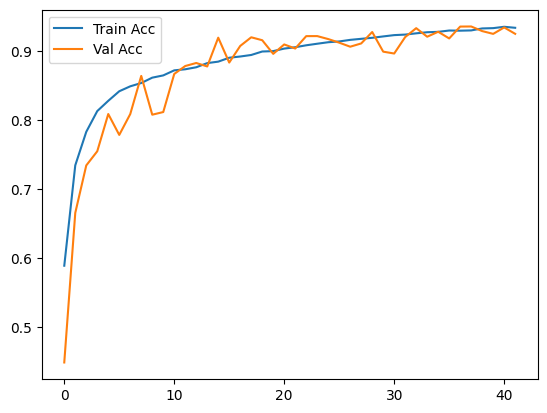

In [140]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

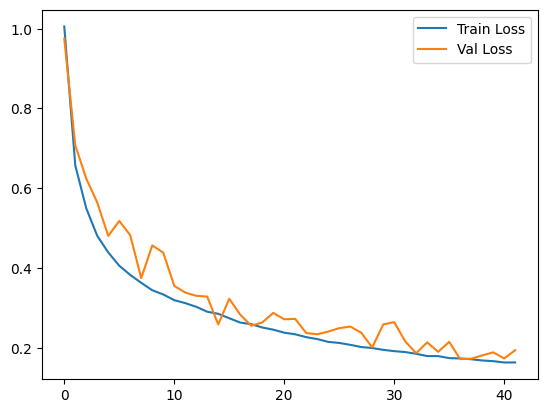

In [141]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [142]:
def preprocess_test(X_test):
    label_encoder_X = pickle.load(open('encoder.pkl', 'rb'))
    standard_scaler = pickle.load(open('scaler.pkl', 'rb'))

    X_test_processed = X_test.copy()

    if 'Jenis Kelamin' in X_test_processed.columns:
        X_test_processed['Jenis Kelamin'] = label_encoder_X.transform(
            X_test_processed['Jenis Kelamin'].astype(str)
        )

    standard_feature = ['Umur (bulan)', 'Tinggi Badan (cm)']
    X_test_processed[standard_feature] = standard_scaler.transform(
        X_test_processed[standard_feature]
    )

    return X_test_processed

254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step


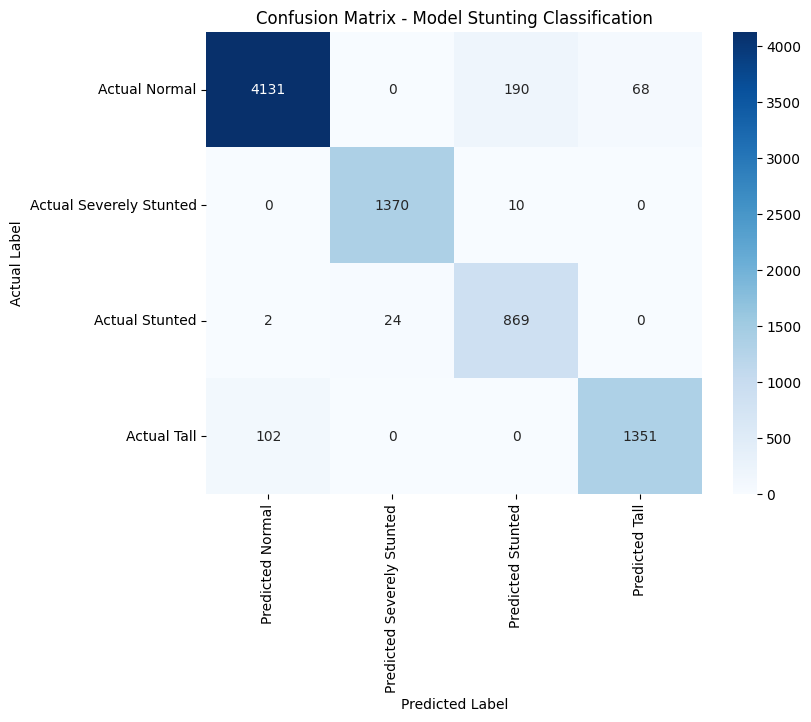


Classification Report:

                  precision    recall  f1-score   support

          Normal     0.9754    0.9412    0.9580      4389
Severely Stunted     0.9828    0.9928    0.9877      1380
         Stunted     0.8129    0.9709    0.8849       895
            Tall     0.9521    0.9298    0.9408      1453

        accuracy                         0.9512      8117
       macro avg     0.9308    0.9587    0.9429      8117
    weighted avg     0.9546    0.9512    0.9519      8117



In [143]:
label_encoder_X = pickle.load(open('encoder.pkl', 'rb'))
label_encoder_y = pickle.load(open('encoder_y.pkl', 'rb'))

X_test_proc = preprocess_test(X_test)

y_pred = model.predict(X_test_proc)

if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    preds_classes = y_pred.argmax(axis=1)
else:
    preds_classes = y_pred.astype(int)

y_test_encoded = y_test.copy()
if y_test_encoded.dtype == 'object' or y_test_encoded.dtype == 'str':
    y_test_encoded = label_encoder_y.transform(y_test_encoded.astype(str))

label_names = ['normal', 'severely stunted', 'stunted', 'tall']

# Confusion Matrix
cm = pd.DataFrame(
    confusion_matrix(y_test_encoded, preds_classes, labels=range(len(label_names))),
    index=[f"Actual {l.title()}" for l in label_names],
    columns=[f"Predicted {l.title()}" for l in label_names]
)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Model Stunting Classification")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(
    y_true=y_test_encoded,
    y_pred=preds_classes,
    target_names=['Normal', 'Severely Stunted', 'Stunted', 'Tall'],
    digits=4
))


In [144]:
# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan ke file .tflite
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Fikri\AppData\Local\Temp\tmp_3cetrvr\assets


INFO:tensorflow:Assets written to: C:\Users\Fikri\AppData\Local\Temp\tmp_3cetrvr\assets


Saved artifact at 'C:\Users\Fikri\AppData\Local\Temp\tmp_3cetrvr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  2872464404752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2872464402448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2872464407824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2872464404368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2872464397648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2872464392656: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import pickle

# Load Model dan Encoder
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

label_encoder_X = pickle.load(open('encoder.pkl', 'rb'))
label_encoder_y = pickle.load(open('encoder_y.pkl', 'rb'))
standard_scaler = pickle.load(open('scaler.pkl', 'rb'))

# Fungsi Preprocessing
def preprocess_test(df):
    df['Jenis Kelamin Encoded'] = label_encoder_X.transform(df['Jenis Kelamin'])

    numeric_features = df[['Umur (bulan)', 'Tinggi Badan (cm)']]
    scaled_values = standard_scaler.transform(numeric_features)

    df['Umur Scaled'] = scaled_values[:, 0]
    df['Tinggi Scaled'] = scaled_values[:, 1]

    df_scaled = df[['Jenis Kelamin Encoded', 'Umur Scaled', 'Tinggi Scaled']]
    return df, df_scaled


# Fungsi untuk memprediksi file csv
def predict_from_csv(csv_path):
    df_input = pd.read_csv(csv_path)
    results = []

    for i, row in df_input.iterrows():
        print(f"\n=== Data ke-{i+1} ===")
        input_data = pd.DataFrame([row])
        
        print("\n=== Data Asli ===")
        print(input_data, "\n")

        input_with_features, input_scaled = preprocess_test(input_data.copy())

        print("=== Hasil Preprocessing ===")
        print(input_scaled, "\n")

        input_tensor = tf.constant(input_scaled.values, dtype=tf.float32)
        interpreter.set_tensor(input_details[0]['index'], input_tensor)
        interpreter.invoke()

        output_data = interpreter.get_tensor(output_details[0]['index'])[0]
        predicted_index = np.argmax(output_data)
        predicted_label = label_encoder_y.inverse_transform([predicted_index])[0]
        confidence = output_data[predicted_index] * 100

        print("=== Confidence Tiap Kelas ===")
        for label, prob in zip(label_encoder_y.classes_, output_data):
            print(f"{label}: {prob*100:.2f}%")

        print("\n=== Hasil Prediksi Akhir ===")
        print(f"Prediksi: {predicted_label}")
        print(f"Confidence: {confidence:.2f}%")
        print(f"Hasil akhir → {predicted_label} ({confidence:.2f}% confidence)\n")

        result = {
            "Jenis Kelamin": row['Jenis Kelamin'],
            "Umur (bulan)": row['Umur (bulan)'],
            "Tinggi Badan (cm)": row['Tinggi Badan (cm)'],
            "Jenis Kelamin Encoded": input_with_features['Jenis Kelamin Encoded'].values[0],
            "Umur Scaled": round(input_with_features['Umur Scaled'].values[0], 4),
            "Tinggi Scaled": round(input_with_features['Tinggi Scaled'].values[0], 4),
            "Prediksi": predicted_label,
            "Confidence (%)": round(confidence, 2)
        }

        for label, prob in zip(label_encoder_y.classes_, output_data):
            result[f"Prob {label} (%)"] = round(prob*100, 2)

        results.append(result)

    df_results = pd.DataFrame(results)

    print("\n\n=== TABEL HASIL AKHIR ===")
    print(df_results)

    return df_results

# Proses inferensi
csv_file = "data_dummy_stunting.csv"
df_output = predict_from_csv(csv_file)

# Simpan hasil prediksi ke file dengan format csv
df_output.to_csv("hasil_prediksi_dengan_preprocessing.csv", index=False)
print("\nHasil lengkap disimpan ke 'hasil_prediksi_dengan_preprocessing.csv'")

c:\Users\Fikri\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



=== Data ke-1 ===

=== Data Asli ===
  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)
0     laki-laki            26               82.2 

=== Hasil Preprocessing ===
   Jenis Kelamin Encoded  Umur Scaled  Tinggi Scaled
0                      0    -0.025273       -0.00892 

=== Confidence Tiap Kelas ===
normal: 11.39%
severely stunted: 0.00%
stunted: 88.61%
tall: 0.00%

=== Hasil Prediksi Akhir ===
Prediksi: stunted
Confidence: 88.61%
Hasil akhir → stunted (88.61% confidence)


=== Data ke-2 ===

=== Data Asli ===
  Jenis Kelamin  Umur (bulan)  Tinggi Badan (cm)
1     perempuan            16               76.5 

=== Hasil Preprocessing ===
   Jenis Kelamin Encoded  Umur Scaled  Tinggi Scaled
1                      1    -0.539342      -0.297816 

=== Confidence Tiap Kelas ===
normal: 99.33%
severely stunted: 0.00%
stunted: 0.54%
tall: 0.13%

=== Hasil Prediksi Akhir ===
Prediksi: normal
Confidence: 99.33%
Hasil akhir → normal (99.33% confidence)


=== Data ke-3 ===

=== Data Asli ===
  J